In [2]:
import numpy as np
import matplotlib.pyplot as plt

!pip install lmfit
import lmfit.models as models
from lmfit import Model

     |████████████████████████████████| 292 kB 5.3 MB/s 
     |████████████████████████████████| 98 kB 7.0 MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.3-py3-none-any.whl size=84401 sha256=6192436969a269f043e1dedd5a5d51c0c5128241a118c399f53077c6e3d12c2f
  Stored in directory: /root/.cache/pip/wheels/b9/7a/d1/236aa0f8196b264fda481a112f7cfb1bfde7bfb20235f8e331
  Created wheel for asteval: filename=asteval-0.9.25-py3-none-any.whl size=17301 sha256=52a369137ebb580005445f0f826233cf488cb0223a71ea878f00d380aa1a6114
  Stored in directory: /root/.cache/pip/wheels/4a/87/53/f1385a55b3f60eabb921c5f4fd151c00fdb016b5111b8c830f
Successfully built lmfit asteval


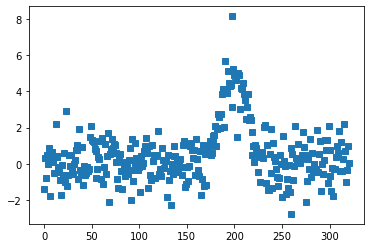

In [6]:
# creating some noisy data

gausmodel = models.gaussian

#define 4 variables

x = np.linspace(-2,2,321)
a = 2
c = .5 # center peak
s = .15

data = gausmodel(x,a,c,s) + np.random.randn(len(x))

plt.plot(data,'s')

In [12]:
gausfit = Model(gausmodel)
result = gausfit.fit(data,x=x)


# R2 fit
r2 = np.corrcoef(data,result.best_fit)[0,1]**2

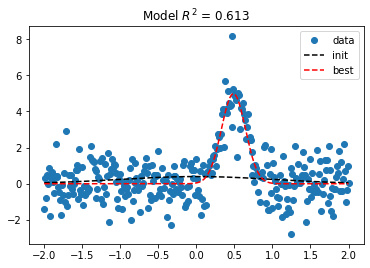

In [16]:
# visualize

plt.plot(x,data,'o',label = 'data')
plt.plot(x,result.init_fit,'k--',label = 'init')
plt.plot(x,result.best_fit,'r--',label = 'best')
plt.title('Model $R^2$ = %.3f'%r2)
plt.legend()

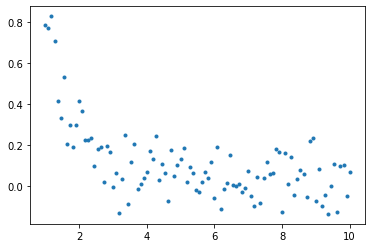

In [27]:
x = np.linspace(1,10,100)
data = 1/x**2 + np.random.normal(loc = 0, scale = np.sqrt(0.01),size = len(x))


plt.plot(x,data,'.')

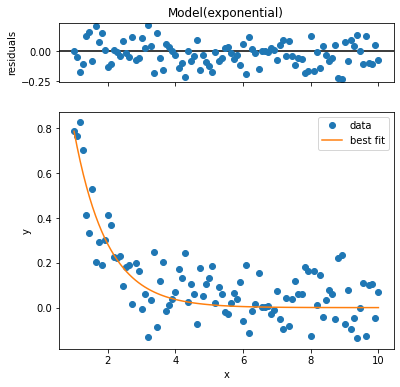

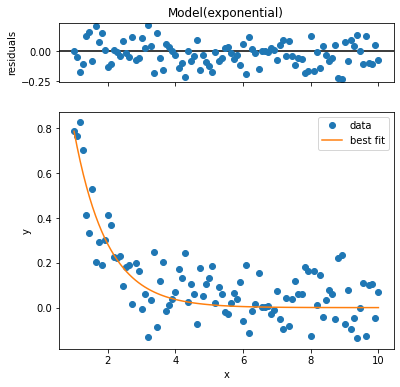

In [28]:
expdecayfit = Model(models.exponential)
result = expdecayfit.fit(data, x=x)
result.plot()

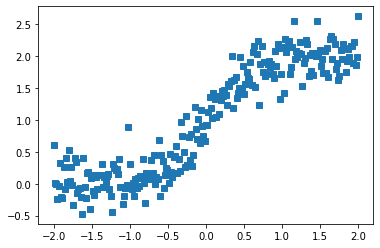

In [37]:
def sigmoid(x,a=1,b=1,t=0):
  eterm = np.exp(-b*(x-t))
  return a/(1+eterm)

x = np.linspace(-2,2,247)
y = sigmoid(x,a=2,b=3.5) + np.random.randn(len(x))/4

plt.plot(x,y,'s')

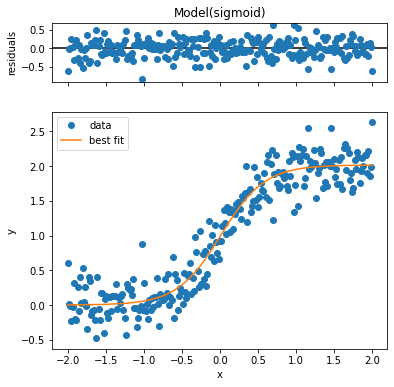

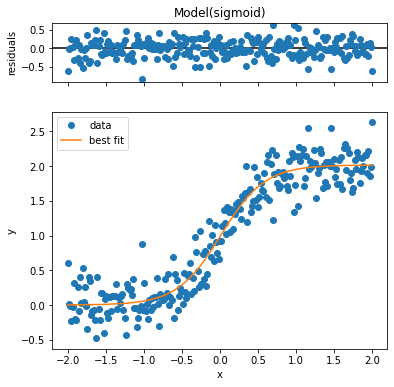

In [41]:
sigmodel = Model(sigmoid)
result = sigmodel.fit(y,x=x)
result.plot()

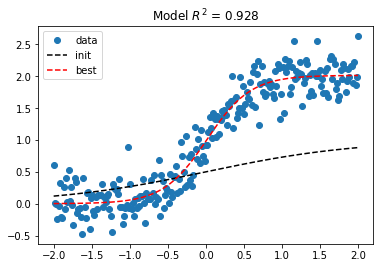

In [43]:
r2 = np.corrcoef(y,result.best_fit)[0,1]**2

plt.plot(x,y,'o',label = 'data')
plt.plot(x,result.init_fit,'k--',label = 'init')
plt.plot(x,result.best_fit,'r--',label = 'best')
plt.title('Model $R^2$ = %.3f'%r2)
plt.legend()

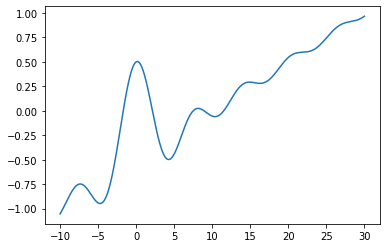

In [46]:
# Conjunctive fit

x = np.linspace(-10,30,1000)
y = np.sin(x)/x + np.linspace(-1,1,len(x))

plt.plot(x,y)

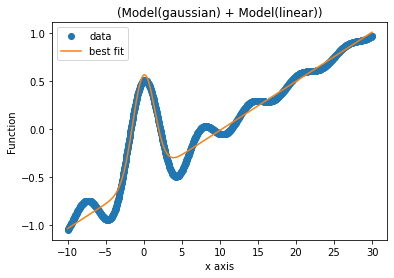

In [54]:
conj_model = Model(models.gaussian) + Model(models.linear)
result = conj_model.fit(y,x=x)

result.plot_fit(ylabel = 'Function',xlabel ='x axis')

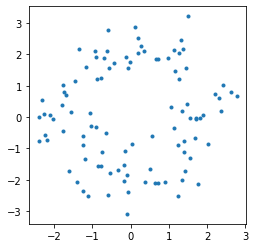

In [76]:
n = 100
th = np.linspace(0,2*np.pi,n)
r = 2

x = r*np.cos(th) + np.random.normal(0,1/r,n)
y = r*np.sin(th) + np.random.normal(0,1/r,n)

plt.plot(x,y,'.')
plt.gca().set_aspect(1/plt.gca().get_data_ratio())

In [77]:
def circlefit(th, r=1):
  x = r*np.cos(th)
  x = r*np.sin(th)

  return x,y


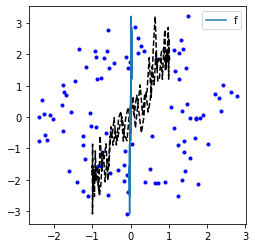

In [78]:
result = Model(circlefit).fit((x,y) ,th=th)

plt.plot(x,y,'b.')
plt.plot(result.init_fit[0],result.init_fit[1],'k--')
plt.plot(result.best_fit[0],result.best_fit[1],label ='f')
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.legend()